# Limpando os dados

In [103]:
import csv
import pandas as pd

data = []
with open('demandas.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='"')
    data = list(spamreader)
    for x in range(len(data)):
        data[x] = [y.replace(";", ",").rstrip() for y in data[x]]        

df = pd.DataFrame(data[1:], columns = data[0])
df['abertura'] =  pd.to_datetime(df['abertura'], format='%Y-%m-%d')

df.loc[df['origem'] == 'Facebook - 1', 'origem'] = 'Facebook'
df.loc[df['origem'] == 'Facebook - 2', 'origem'] = 'Facebook'

# Entendendo os Dados
1. **OS DADOS NÃO FORAM ANONIMIZADOS** existem chamados que possuem dados pessoais das pessoas.
2. Existem vários chamados de "teste" ou com dados estranhos como links ou códigos (provavlemente bots), além de chamados repetidos
3. Pedidos da categoria de Lei de Acesso a Informação (LAI) existem vários pedidos de dados para teses


In [104]:
df.describe()

,abertura,tipo,solicitacao,descricao,tipo_solicitacao,origem,situacao
count,7695,7695,7695,7695,7695,7695,7695
unique,535,97,7316,40,6,10,2
top,2017-02-06 00:00:00,Iluminação Pública Irregular,moradores denuncia uma casa que esta para vend...,Centro,Solicitação de Serviço,Telefone,Fechado
freq,52,1664,43,1337,4267,4709,6043
first,2015-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


## Abertura
Dia em que foi aberto o chamado

## Solicitação

## Descrição

## Origem 

## Solicitação

## Tipo de Solicitação
LAI - Lei de Acesso a Informação

In [105]:
print("Tipos de Solicitação")
print(df['tipo_solicitacao'].value_counts())
print("\n")

#for row in df[df['tipo_solicitacao'] == 'Audiência Pública']['solicitacao']:
#    print(row + "\n")

Tipos de Solicitação
Solicitação de Serviço    4267
Denuncia                  1730
Reclamação                1298
Informação                 218
LAI                        117
Audiência Pública           65
Name: tipo_solicitacao, dtype: int64




## Tipo

# Hipóteses


## Origem dos chamados

In [166]:
%matplotlib inline

#import matplotlib.pyplot as plt
from matplotlib.pyplot import *

origem = df['origem'].value_counts()
#origem['Facebook'] = origem['Facebook - 1'] + origem['Facebook - 2']
#del(origem['Facebook - 1'])
#del(origem['Facebook - 2'])
origem = origem.sort_values()
print(origem)


Radio escuta                  1
Colab                         1
Instagram                     3
Email                        49
Audiências Públicas          69
Lai                         113
Portal da transparência     306
Presencial                 1113
Facebook                   1331
Telefone                   4709
Name: origem, dtype: int64


#### Quantidade de chamados por tipo

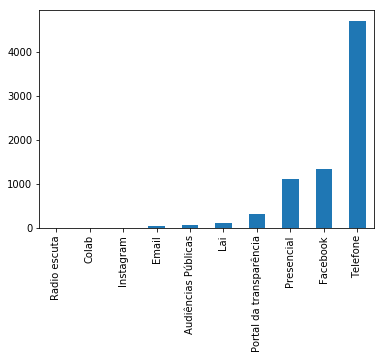

In [169]:
origem.plot(kind="bar")

#### Quantidade de chamados por tipo no ano de 2017

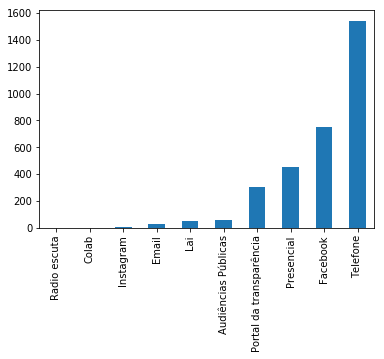

In [172]:
df[df['abertura'] >= '2017-01-01']['origem'].value_counts().sort_values().plot(kind="bar")

### Qual a visão geral do atendimento entre Facebook, Telefone, Presencial e Portal da Transparência?

In [173]:
facebook = df.loc[df['origem'] == 'Facebook']['abertura'].value_counts().sort_index()
telefone = df.loc[df['origem'] == 'Telefone']['abertura'].value_counts().sort_index()
presencial = df.loc[df['origem'] == 'Presencial']['abertura'].value_counts().sort_index()
transparencia = df.loc[df['origem'] == 'Portal da transparência']['abertura'].value_counts().sort_index()

for x in zip([facebook, telefone, presencial, transparencia], ["facebook", "telefone", "presencial", "transparencia"]):
    media = x[0].count()/df.count().abertura
    print("Média de atendimentos por " + x[1] + ": " + str(media))

Média de atendimentos por facebook: 0.0463937621832
Média de atendimentos por telefone: 0.0652371669916
Média de atendimentos por presencial: 0.0561403508772
Média de atendimentos por transparencia: 0.0172839506173


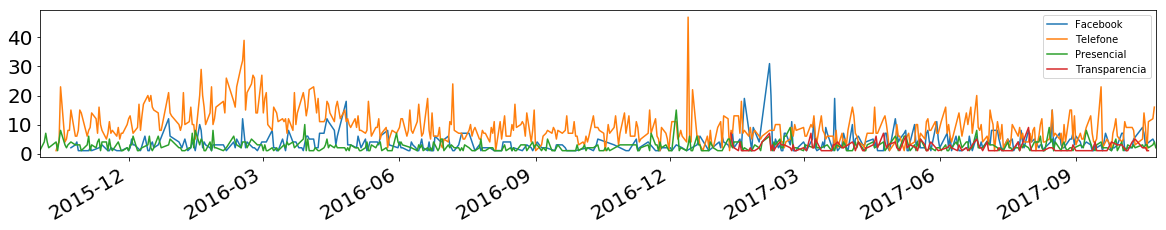

In [164]:
fig, ax = subplots()

facebook.plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
telefone.plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
presencial.plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
transparencia.plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
ax.legend(["Facebook", "Telefone", "Presencial", "Transparencia"]);

### Qual a visão geral do atendimento entre Facebook, Telefone e Presencial no ultimo ano?

In [165]:
for x in zip([facebook.loc[facebook.index >= '2017-01-01'], telefone.loc[telefone.index >= '2017-01-01'], presencial.loc[presencial.index >= '2017-01-01'], transparencia.loc[transparencia.index >= '2017-01-01']], ["facebook", "telefone", "presencial", "transparencia"]):
    media = x[0].count()/df[df.abertura >= '2017-01-01'].count().abertura
    print("Média de atendimentos por " + x[1] + " no ultimo ano: " + str(media))

Média de atendimentos por facebook no ultimo ano: 0.0535378835316
Média de atendimentos por telefone no ultimo ano: 0.0632435817157
Média de atendimentos por presencial no ultimo ano: 0.0529117094552
Média de atendimentos por transparencia no ultimo ano: 0.0416405760802


### Chamados acumulados no geral

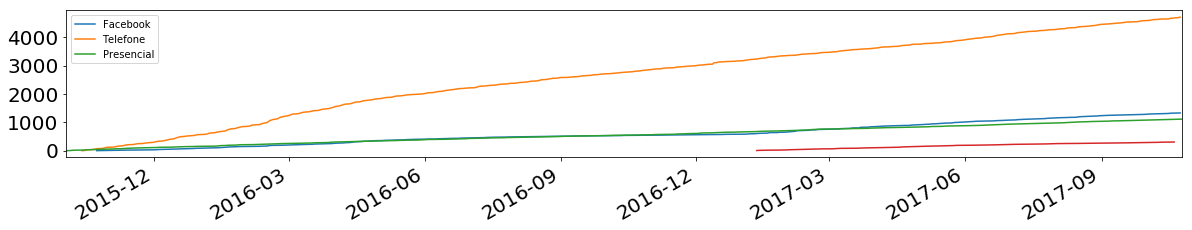

In [178]:
fig, ax = subplots()
facebook.cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
telefone.cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
presencial.cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
transparencia.cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
ax.legend(["Facebook", "Telefone", "Presencial"]);

### Chamados acumulados em 2017

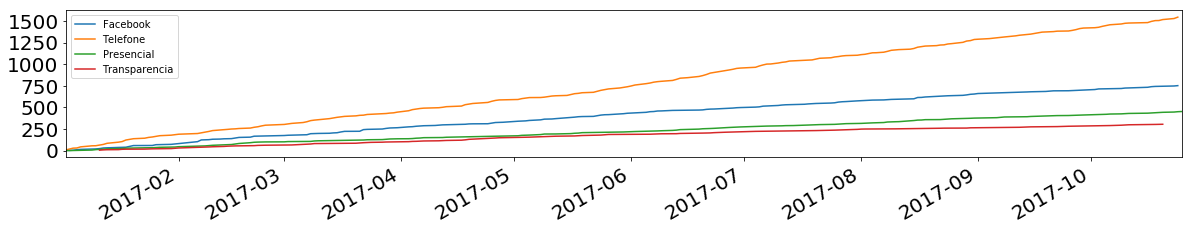

In [180]:

fig, ax = subplots()
facebook.loc[facebook.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
telefone.loc[telefone.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
presencial.loc[presencial.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
transparencia.loc[transparencia.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 3), fontsize=20, legend=True, ax=ax)
ax.legend(["Facebook", "Telefone", "Presencial", "Transparencia"]);

## Comparar quantidade de chamados por bairro durante as diferentes gestões

## Dengue ocorre em maior quantidade nos bairros pobres?? (Existem dados relacionado a "riqueza" dos bairros?)